In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns

In [2]:
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [3]:
train_path =r"D:\College\Deep Learning Assignment 1\Train"
# test_path = r"E:\ASSIGNMENTS_DEEP_LEARNIGN\Assignment_1\Test"

In [4]:
cv2.imread(r"D:\College\Deep Learning Assignment 1\Train\Clean\Clean (7).jpg").shape

(798, 1420, 3)

In [6]:
train = ImageDataGenerator(rescale = 1/255)
# test = ImageDataGenerator(rescale = 1/255)

In [7]:
train = train.flow_from_directory(
                                    train_path,
                                    target_size=(48,48),
                                    class_mode='categorical',
                                    batch_size=32
                                 )

Found 885 images belonging to 6 classes.


In [8]:
# test = test.flow_from_directory(
#                                     test_path,
#                                     target_size=(48,48),
#                                     class_mode='categorical',
#                                     batch_size=32
#                                  )

In [9]:
train.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [17]:
# Define the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    
    Conv2D(32, (3, 3), activation='relu'),
    
    MaxPool2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    
    Conv2D(128, (3, 3), activation='relu'),
    
    MaxPool2D(2, 2),
    
    Flatten(),
    
    Dense(units=512, activation='relu'),
    
    Dense(units=6, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 44, 44, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 20, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 18, 18, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     5,308,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,409,446 (20.64 MB)

 Trainable params: 5,409,446 (20.64 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
md=model.fit(train, epochs=10,batch_size=32)

Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 569ms/step - accuracy: 0.2316 - loss: 1.7864
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 370ms/step - accuracy: 0.3484 - loss: 1.6490
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 370ms/step - accuracy: 0.4222 - loss: 1.4300
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 394ms/step - accuracy: 0.5129 - loss: 1.3304
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 361ms/step - accuracy: 0.5835 - loss: 1.1629
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 351ms/step - accuracy: 0.6284 - loss: 1.0256
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 341ms/step - accuracy: 0.6378 - loss: 0.9739
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 405ms/step - accuracy: 0.7036 - loss: 0.8089
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 357ms/step - accuracy: 0.7786 - loss: 0.6688
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 325ms/step - accuracy: 0.8344 - loss: 0.5285


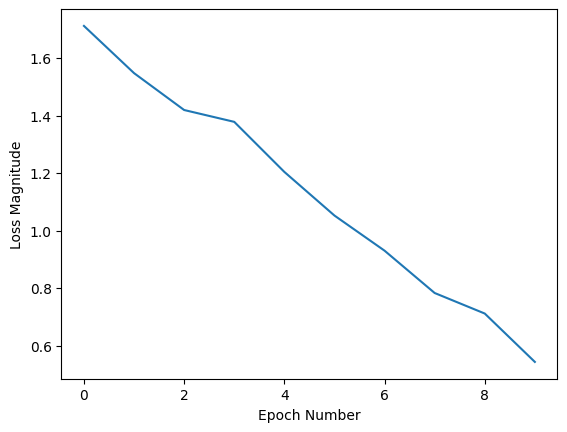

In [20]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(md.history['loss'])


In [23]:
loss,accuracy= model.evaluate(train)

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 412ms/step - accuracy: 0.8644 - loss: 0.4078


In [24]:
print("Accuracy of test data : ",accuracy*100,"%")

Accuracy of test data :  85.42372584342957 %


In [25]:
print("Loss of test data : ",loss)

Loss of test data :  0.4138015806674957


In [26]:
model.save("D:\College\Deep Learning Assignment 1\Model.h5")